<a href="https://colab.research.google.com/github/Pipo0603/ExerciseAI/blob/main/fingerprint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from os import listdir
from numpy import asarray
from numpy import save
from keras import preprocessing
from tensorflow.keras.utils import load_img, img_to_array

In [5]:
data="/content/drive/MyDrive/Chi_tay/"

In [7]:
print("Bắt đầu xử lý ảnh...")
pixels,labels=list(),list()
for folder in listdir(data):
    if folder!='.DS_Store':
        #print("Folder=",folder)
        for file in listdir(data  + folder):
            if file!='.DS_Store':
                #print("File=", file)
                pixel=load_img(data  + folder +"/" + file,target_size=(280,280))
                pixel=img_to_array(pixel)
                pixels.append(pixel)
                labels.append( folder)

pixels =asarray(pixels)
labels =asarray(labels)#.reshape(-1,1)

Bắt đầu xử lý ảnh...


In [8]:
from sklearn.preprocessing import LabelBinarizer
import pickle
from sklearn.model_selection import train_test_split
encoder = LabelBinarizer()
labels = encoder.fit_transform(labels)
#print(labels)

file = open('pix.data', 'wb')
# dump information to that file
pickle.dump((pixels,labels), file)
# close the file
file.close()
     

In [9]:
def load_data():
    file = open('pix.data', 'rb')
    # dump information to that file
    (pixels, labels) = pickle.load(file)
    # close the file
    file.close()
    return pixels, labels

#save_data()
X,y = load_data()
#random.shuffle(X)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=100)

In [10]:
print(X_train.shape)
print(X_test.shape)

(26, 280, 280, 3)
(7, 280, 280, 3)


In [11]:
from keras.models import Sequential
from keras.layers import Dense
from numpy.ma.core import reshape

In [12]:

X_train= X_train.astype('float32')/255
print(y_train.shape)
X_test= X_test.astype('float32')/255

(26, 5)


In [13]:
from keras import models 
from keras.models import Sequential,Model
from keras import Input
from keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPooling2D,Normalization
from keras.optimizers import Adam
batch_size=50 #lô
epochs=20     #số lần học
classes=5    #phân loại

In [14]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='linear',input_shape=(280,280,3),padding='same'))
from keras.layers import LeakyReLU
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))
#so lan tich chap
model.add(Conv2D(64,(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Conv2D(128,(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

In [15]:
from keras import optimizers
from keras import losses
model.add(Flatten())
model.add(Dense(1000,activation='linear'))
model.add(Dense(500,activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(classes,activation='softmax'))
model.compile(loss=losses.categorical_crossentropy,optimizer=Adam(),metrics=['accuracy'])
model.summary()
train=model.fit(X_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 280, 280, 32)      896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 280, 280, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 140, 140, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 140, 140, 64)      18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 140, 140, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 70, 70, 64)       0         
 2D)                                                    

In [16]:
train=model.fit(X_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1)

Epoch 1/20
1/1 [==============================] - 0s 174ms/step - loss: 0.2711 - accuracy: 0.9231
Epoch 2/20
1/1 [==============================] - 0s 144ms/step - loss: 0.2160 - accuracy: 0.9615
Epoch 3/20
1/1 [==============================] - 0s 130ms/step - loss: 0.1816 - accuracy: 0.9231
Epoch 4/20
1/1 [==============================] - 0s 127ms/step - loss: 0.1713 - accuracy: 0.9231
Epoch 5/20
1/1 [==============================] - 0s 111ms/step - loss: 0.1541 - accuracy: 0.9615
Epoch 6/20
1/1 [==============================] - 0s 113ms/step - loss: 0.1412 - accuracy: 0.9231
Epoch 7/20
1/1 [==============================] - 0s 124ms/step - loss: 0.1290 - accuracy: 0.9231
Epoch 8/20
1/1 [==============================] - 0s 127ms/step - loss: 0.1139 - accuracy: 0.9615
Epoch 9/20
1/1 [==============================] - 0s 116ms/step - loss: 0.1149 - accuracy: 0.9231
Epoch 10/20
1/1 [==============================] - 0s 115ms/step - loss: 0.1094 - accuracy: 0.9231
Epoch 11/20
1/1 [==

In [17]:
model.save("/content/drive/MyDrive/Colab Notebooks/BT/nhan_dien_chi_tay.h5")

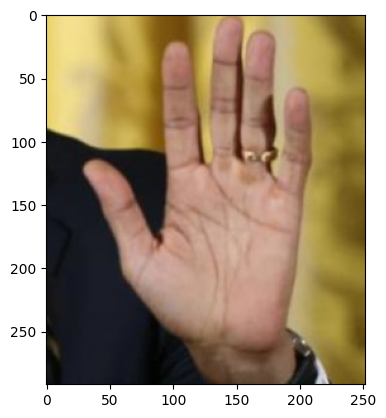

In [25]:
from keras.saving.saving_lib import load_model
import matplotlib.pyplot as plt
from keras.models import load_model
model100=load_model("/content/drive/MyDrive/Colab Notebooks/BT/nhan_dien_chi_tay.h5")
img=load_img('/content/drive/MyDrive/Chi_tay/Chi_tay_5/hinh33.jpg')
plt.imshow(img)
plt.show()

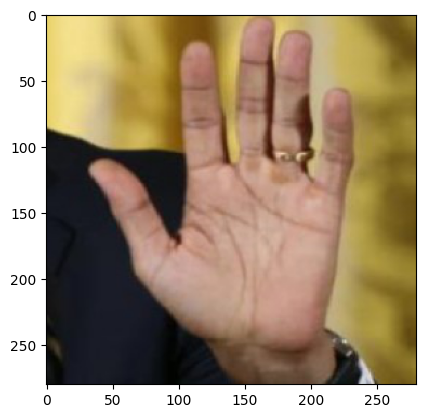

In [26]:
img = load_img('/content/drive/MyDrive/Chi_tay/Chi_tay_5/hinh33.jpg',target_size=(280,280))
plt.imshow(img)

In [27]:
import numpy as np
class_name = ['Chi_tay_1','Chi_tay_2','Chi_tay_3','Chi_tay_4','Chi_tay_5']
img1=img_to_array(img)
img1=img1.reshape(1,280,280,3)
img1=img1.astype('float32')
img1=img1/255
predict = model100.predict(img1)

print("This picture is: ", class_name[np.argmax(predict[0])], (predict[0]))
print(np.argmax(predict[0]))
print(np.max(predict[0],axis=0))

1/1 [==============================] - 0s 76ms/step
This picture is:  Chi_tay_5 [1.2062379e-08 3.1738505e-09 1.0752466e-05 3.6246804e-06 9.9998558e-01]
4
0.9999856


Là người rất sáng tạo trong công việc và đời sống
Thích mạo hiểm, có tương lai lãnh đạo
Hay đưa quyết định quan trọng
Tràn trề năng lượng
Luôn khoẻ mạnh và nhiệt huyết trong công việc và cuộc sống
Hãy chú ý cận thận trong chuyện tình cảm


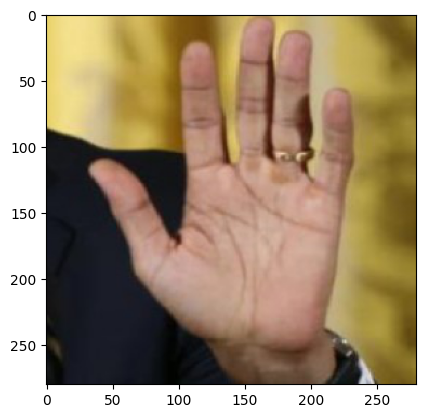

In [31]:
plt.imshow(img)
if np.argmax(predict[0])==1:
  print("Là người có tính độ lượng, hào phóng")
  print("Tính tình rộng rãi, cởi mở, hòa đồng")
  print("Có nhiều ước mơ, tham vọng, tự tin")
  print("Lận đận trong tình yêu")
  print("Ít bị bệnh, sức sống mãnh liệt")
  print("Cuộc đời không giàu không nghèo")
elif np.argmax(predict[0])==2:
  print("Đề phòng tai nạn, bệnh tật bất ngờ")
  print("Không có năng khiếu học")
  print("Thiếu nghị lực, hơi nhẹ dạ")
  print("Tình cảm không sâu, không nhiệt tình")
  print("Có năng khiếu với thể thao")
  print("Có sự thay đổi tốt hoặc xấu, đề phòng bị mất trộm, lừa đảo")
  print("Cuộc đời bấp bênh, nhiều thay đổi")
elif np.argmax(predict[0])==3:
  print("Tình cảm sâu sắc, bền bỉ, say mê")
  print("Người có tính cách hay lừa gạt, nói dối")
  print("Thể hiện tình cảm quá lộ liễu")
  print("Đào hoa và có nhiều người yêu. Nhưng lại không có các mối quan hệ nghiêm túc ")
  print("Tại một thời điểm trong cuộc sống, phải hy sinh lợi ích của mình cho người khác")
elif np.argmax(predict[0])==5:
  print("là người biết cách điều khiển cảm xúc")
  print("Người dễ rung động trong tình cảm")
  print("Hết lòng vì người mình thương")
  print("Người dễ bị tổn thương, yếu đuối")
  print("Hay bị người khác lừa vì tin người")
  print("Hoàn toàn bị kiểm soát bởi định mệnh")
elif np.argmax(predict[0])==4:
  print("Là người rất sáng tạo trong công việc và đời sống")
  print("Thích mạo hiểm, có tương lai lãnh đạo")
  print("Hay đưa quyết định quan trọng")
  print("Tràn trề năng lượng")
  print("Luôn khoẻ mạnh và nhiệt huyết trong công việc và cuộc sống")
  print("Hãy chú ý cận thận trong chuyện tình cảm")